In [3]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [4]:
# Read csv file 
cdc_df = pd.read_csv('cdc.codes/cdc.csv')
full_data_2017 = pd.read_csv('cdc.codes/2017_code_data.csv')
full_data_2017
adult_data_2017 = pd.read_csv('cdc.codes/samadult.csv')
adult_data_2017

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,...,MBO_PRO1,YTQU_YG1,YTQ_BTY1,YTQ_MDY1,YTQU_TA1,YTQ_BTT1,YTQ_MDT1,YTQU_QG1,YTQ_BTQ1,YTQ_MDQ1
0,1,1,3,1,5829.3,5044,2,12,4,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
1,1,1,9,1,2752.4,3770,1,12,7,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
2,2,1,11,1,14902.0,17305,1,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
3,1,1,15,1,8531.8,7383,2,12,5,1,...,2,1,1.0,1.0,1,1.0,2.0,2,NaN,NaN
4,1,1,18,1,5477.2,8314,1,0,1,1,...,2,1,1.0,1.0,2,NaN,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26737,2,1,58880,4,7030.2,6082,2,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26738,1,1,58881,4,6261.6,5557,2,12,4,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26739,1,1,58882,4,7818.1,7603,2,12,1,2,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26740,1,1,58883,4,8691.9,7833,1,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN


In [5]:
# Reorganize the columns
cdc_df = cdc_df[['Code', 'Description', 'Category']]
cdc_df


,Code,Description,Category
0,URBRRL,Geography (urban vs suburban vs rural),Demographics
1,REGION,"US Geographic Region (SE, NW)",Demographics
2,SEX_A,Sex,Demographics
3,HISP_A,Hispanic ethnicity,Demographics
4,HISPALLP_A,Hispanic and other ethnicity (mixed),Demographics
...,...,...,...
69,MODFREQW_A,moderate physical activity (Y/N) / frequency,Lifestyle / Chronic Disease Indicators
70,VIGFREQW_A,vigorous physical activity (Y/N) / frequency,Lifestyle / Chronic Disease Indicators
71,PA18_05R_A,met 2018 physical activity guidelines = 150+ m...,Lifestyle / Chronic Disease Indicators
72,SLPREST_A,"sleep quality (""over past 30 days, how often d...",Lifestyle / Chronic Disease Indicators


In [6]:
# Removing spaces in column names
adult_data_2017.columns = adult_data_2017.columns.to_series().apply(lambda x:x.strip())


In [7]:
# Selecting the columns we need and adding them to a dataframe
filtered_data_2017 = adult_data_2017 [["AFLHCA17","REGION", "SEX", "HISPAN_I","RACERPI2",
                              "R_MARITL", "HYPEV", "CHLEV", "CHDEV",
                              "EPHEV", "AASMEV", "CANEV", "DIBEV1",
                              "DIBTYPE", "EPILEP1", "ARTH1", "HRAIDNOW",
                              "AVISION", "AHSTATYR", "PAINLMT", "FLWALK",
                              "ALCHRONR", "SMKSTAT2", "MODFREQW", "ALCSTAT",
                              "AHCPLROU", "AWORPAY", "ADNLONG2", "AHCSYR1",
                              "AHERNOY2", "AHCHYR", "ASRGYR", "AMDLONGR",
                              "AEXCHNG", "ASICPUSE", "ASISIM", "ASISIF",
                              "ASISLPFL", "MBO_SPR1", "AWEBUSE"]]
filtered_data_2017.head()

,AFLHCA17,REGION,SEX,HISPAN_I,RACERPI2,R_MARITL,HYPEV,CHLEV,CHDEV,EPHEV,...,AHCHYR,ASRGYR,AMDLONGR,AEXCHNG,ASICPUSE,ASISIM,ASISIF,ASISLPFL,MBO_SPR1,AWEBUSE
0,NaN,3,2,12,1,4,1,1,2,2,...,2,2,2,NaN,4,NaN,2.0,0,2,1
1,NaN,2,1,12,1,7,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,6,2,1
2,2.0,2,1,12,1,1,2,2,2,2,...,2,2,1,2.0,3,2.0,NaN,7,2,1
3,NaN,2,2,12,1,5,2,2,2,2,...,2,2,1,NaN,4,NaN,2.0,0,1,1
4,NaN,3,1,0,1,1,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,0,1,1


In [8]:
# Renaming columns
filtered_data_2017 = filtered_data_2017.rename(columns = {"AFLHCA17" : "Suffering from Dep/Anx", "REGION" : "Geographic Region", "SEX" : "SEX",
                                                          "HISPAN_I" : "Hispanic Origin",
                                                          "RACERPI2" : "Race", "R_MARITL" : "Marital Status",
                                                          "HYPEV" : "Hypertension", "CHLEV" : "Cholesterol",
                                                          "CHDEV" : "Coronary Heart Disease", "EPHEV" : "emphysema",
                                                          "AASMEV" : "Asthma", "CANEV" : "Cancer",
                                                          "DIBEV1" : "Diabetes", "DIBTYPE" : "Diabetes Type",
                                                          "EPILEP1" : "Epilepsy", "ARTH1" : "Arthritis",
                                                          "HRAIDNOW" : "Usin a Hearing Aid",
                                                          "AVISION" : "Trouble seeing W/Glasses/Lenses",
                                                          "AHSTATYR" : "Health Status (Past 12m)",
                                                          "PAINLMT" : "Pain Severity (Past 6m)",
                                                          "FLWALK" : "Mobility/Ability to Walk Unaided",
                                                          "ALCHRONR" : "Overall Functional Limitation",
                                                          "SMKSTAT2" : "Smoking Status",
                                                          "MODFREQW" : "Moderate Activity/W",
                                                          "ALCSTAT" : "Alcohol Drinking Status",
                                                          "AHCPLROU" : "Usual Place for Routine/Preventive Care",
                                                          "AWORPAY" : "Medical Bills Pay Worry",
                                                          "ADNLONG2" : "Time Since Dentist's Last Visit",
                                                          "AHCSYR1" : "Seen/Talked With Mental Specialist (Past 12m)",
                                                          "AHERNOY2" : "ER/ED Freq. (Past 12m)",
                                                          "AHCHYR" : "Home Care Received (Past 12m)",
                                                          "ASRGYR" : "Surgery/Surgical Procedures (Past 12m)",
                                                          "AMDLONGR" : "Time Since Last Seen/Talked to a Health Pro",
                                                          "AEXCHNG" : "Looked into Buying Ins. through Healthcare.gov/Health Ins. MP",
                                                          "ASICPUSE" : "Computer Use Freq.", "ASISIM" : "Sexual Orientation (M)",
                                                          "ASISIF" : "Sexual Orientation (F)",
                                                          "ASISLPFL" : "Difficutly Falling Asleep (Past W)",
                                                          "MBO_SPR1" : "Used Spiritual Meditation (Past 12m)",
                                                          "AWEBUSE" : "Internet use"
        })
filtered_data_2017.head()

,Suffering from Dep/Anx,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,...,Home Care Received (Past 12m),Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use
0,NaN,3,2,12,1,4,1,1,2,2,...,2,2,2,NaN,4,NaN,2.0,0,2,1
1,NaN,2,1,12,1,7,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,6,2,1
2,2.0,2,1,12,1,1,2,2,2,2,...,2,2,1,2.0,3,2.0,NaN,7,2,1
3,NaN,2,2,12,1,5,2,2,2,2,...,2,2,1,NaN,4,NaN,2.0,0,1,1
4,NaN,3,1,0,1,1,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,0,1,1


In [9]:
# Add correlation function to DataSet
filtered_data_2017.corr()

,Suffering from Dep/Anx,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,...,Home Care Received (Past 12m),Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use
Suffering from Dep/Anx,1.000000,0.000955,-0.005242,-0.011779,0.016701,-0.031529,-0.016992,-0.007739,-0.016819,0.036561,...,0.008832,0.027631,0.031850,0.020245,-0.000967,-0.006924,0.013164,-0.000201,0.028262,0.024834
Geographic Region,0.000955,1.000000,-0.003476,-0.127433,0.102981,-0.019466,0.014514,0.024657,0.008879,0.013381,...,0.007307,0.002498,0.030719,-0.014825,-0.002422,-0.019254,-0.010121,-0.009182,-0.017050,-0.013610
SEX,-0.005242,-0.003476,1.000000,-0.010284,0.001625,0.005377,0.014775,0.011847,0.039146,0.010110,...,-0.007699,-0.008333,-0.103202,-0.001529,0.013273,NaN,NaN,0.021530,-0.004031,0.007057
Hispanic Origin,-0.011779,-0.127433,-0.010284,1.000000,0.030976,-0.022320,-0.065513,-0.038840,-0.017371,-0.017670,...,-0.004929,-0.024482,-0.060030,-0.000113,0.116502,0.004063,-0.013656,0.004872,-0.001790,-0.022667
Race,0.016701,0.102981,0.001625,0.030976,1.000000,0.055652,0.012930,0.035775,0.008747,0.008144,...,0.009636,0.027348,0.029754,0.012538,-0.015047,0.010015,0.023037,0.014644,0.013445,0.021608
Marital Status,-0.031529,-0.019466,0.005377,-0.022320,0.055652,1.000000,0.077502,0.096274,0.027240,0.001262,...,0.002316,0.032468,0.070647,0.010165,-0.015612,0.015558,0.041226,0.021344,0.007041,0.012614
Hypertension,-0.016992,0.014514,0.014775,-0.065513,0.012930,0.077502,1.000000,0.261508,0.161203,0.096485,...,0.039636,0.050745,0.141993,0.005745,0.143763,-0.004863,0.002111,-0.007352,0.006211,-0.054297
Cholesterol,-0.007739,0.024657,0.011847,-0.038840,0.035775,0.096274,0.261508,1.000000,0.161516,0.126478,...,0.023799,0.040870,0.114271,0.011535,0.052158,0.015676,0.026461,0.012565,0.025287,-0.012937
Coronary Heart Disease,-0.016819,0.008879,0.039146,-0.017371,0.008747,0.027240,0.161203,0.161516,1.000000,0.188694,...,0.017122,0.027067,0.031724,0.004995,0.040095,0.003385,0.020957,0.015760,0.010491,-0.011202
emphysema,0.036561,0.013381,0.010110,-0.017670,0.008144,0.001262,0.096485,0.126478,0.188694,1.000000,...,0.012326,0.030645,0.028183,0.007866,0.041979,0.005023,0.016929,-0.001278,0.004364,-0.012006


In [10]:
# Renaming the dataframe
df_17 = filtered_data_2017
corr = df_17.corr()

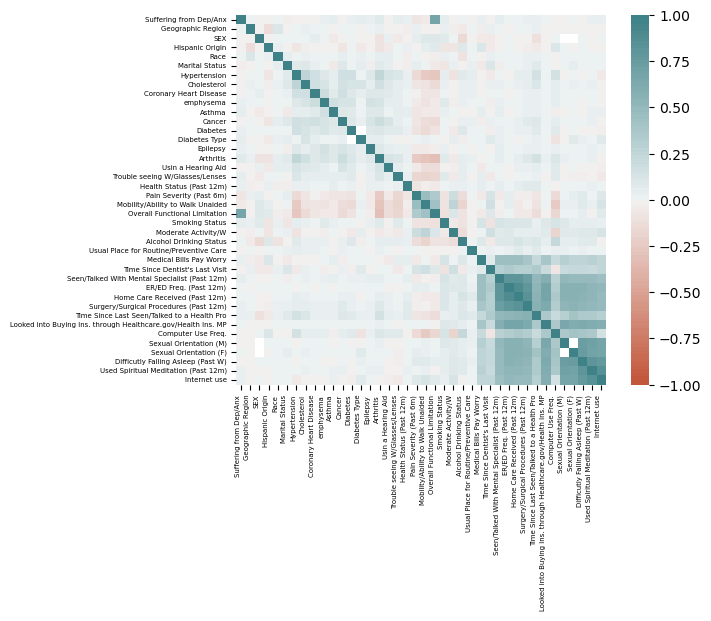

In [11]:
# plot a heat matrix
ax = sns.heatmap(corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, sep=1, n=100, l=50),
    square=True,
    xticklabels=True,
    yticklabels=True)

ax.set_yticklabels(ax.get_yticklabels(),fontsize=5);

ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=5,
    horizontalalignment='right'
  
);

# Save image
plt.savefig("resources/Fig1.png")

### This is a correlation matrix showing the degree of association between different vaoriables. Six factors were selected based on their colors, that show possible correlation with depression. These factors are: Hypertension, Arthritis, Overall Functional Limitations, Health Status, Pain Severity, and Smoking Status.

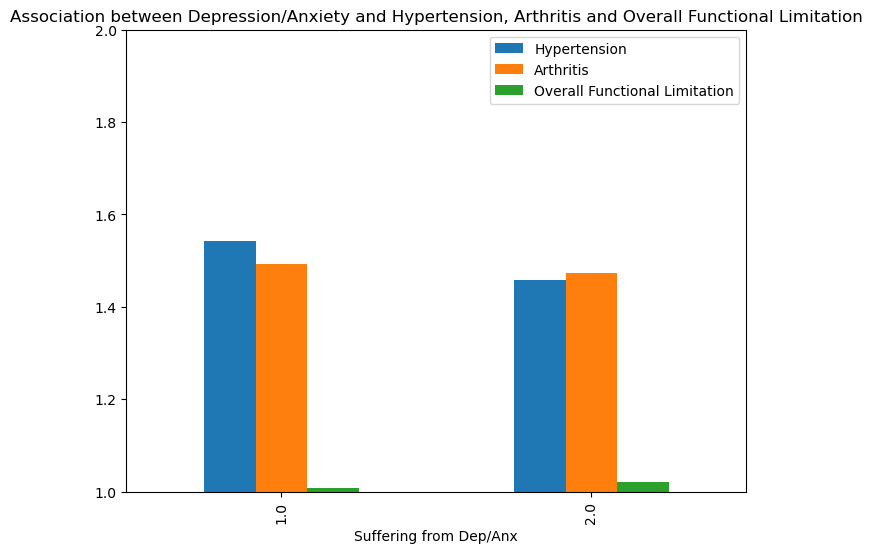

In [12]:
#Create Bar Charts Comparing the Association between Depression and each of these Factors: Hypertension, Arthritis and Overall Functional Limitations
dep_df = filtered_data_2017[["Suffering from Dep/Anx","Hypertension","Arthritis","Overall Functional Limitation"]].dropna()

#get just yes and no's
dep_df = dep_df.loc[ filtered_data_2017["Suffering from Dep/Anx"].isin([1,2])
                   & filtered_data_2017["Hypertension"].isin([1,2])
                   & filtered_data_2017["Arthritis"].isin([1,2])
                   & filtered_data_2017["Overall Functional Limitation"].isin([1,2]), :]

dep_df.groupby("Suffering from Dep/Anx").mean().plot.bar(figsize =(8,6), ylim=(1,2))
plt.title("Association between Depression/Anxiety and Hypertension, Arthritis and Overall Functional Limitation")

# Save image
plt.savefig("resources/Fig2.png")

### Individuals with depression are more likely to have hypertension or arthritis than those without.

In [13]:
#Calculate Depression / Hypertension Chi Square
def calcDepressionHypertensionChiSquare(column, indexList):
    
    dep_y_hyp = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==1][column].value_counts()
    dep_n_hyp = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==2][column].value_counts()
    
    
    dep_y_hyp = dep_y_hyp.reset_index()
    dep_n_hyp = dep_n_hyp.reset_index()

    dep_y_hyp = dep_y_hyp.loc[dep_y_hyp["index"].isin(indexList),:]
    dep_n_hyp = dep_n_hyp.loc[dep_n_hyp["index"].isin(indexList),:]
    
    dep_y_hyp["Depression"] = "Yes"
    dep_n_hyp["Depression"] = "No"
    
    dep_hyp_counts_df = pd.concat([dep_n_hyp,dep_y_hyp])
    

    dep_hyp_counts_df["Expected"] = dep_hyp_counts_df[column].mean()
    
    print(dep_hyp_counts_df)
    
    critical_value = st.chi2.ppf(q = 0.95, df = len(dep_hyp_counts_df["Expected"])-1)
    
    chiSquare = st.chisquare(dep_hyp_counts_df[column],dep_hyp_counts_df["Expected"])
    
    print(chiSquare)
    
calcDepressionHypertensionChiSquare("Hypertension", [1,2])

   index  Hypertension Depression  Expected
0      1          5605         No   2773.25
1      2          4738         No   2773.25
0      2           409        Yes   2773.25
1      1           341        Yes   2773.25
Power_divergenceResult(statistic=8432.189218426034, pvalue=0.0)


In [14]:
#Calculate Depression / Arthritis Chi Square
def calcDepressionArthritisChiSquare(column, indexList):
    
    dep_y_hyp = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==1][column].value_counts()
    dep_n_hyp = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==2][column].value_counts()
    
    
    dep_y_hyp = dep_y_hyp.reset_index()
    dep_n_hyp = dep_n_hyp.reset_index()

    dep_y_hyp = dep_y_hyp.loc[dep_y_hyp["index"].isin(indexList),:]
    dep_n_hyp = dep_n_hyp.loc[dep_n_hyp["index"].isin(indexList),:]
    
    dep_y_hyp["Depressed"] = "Yes"
    dep_n_hyp["Depressed"] = "No"
    
    dep_hyp_counts_df = pd.concat([dep_n_hyp,dep_y_hyp])
    

    dep_hyp_counts_df["Expected"] = dep_hyp_counts_df[column].mean()
    
    print(dep_hyp_counts_df)
    
    critical_value = st.chi2.ppf(q = 0.95, df = len(dep_hyp_counts_df["Expected"])-1)
    
    chiSquare = st.chisquare(dep_hyp_counts_df[column],dep_hyp_counts_df["Expected"])
    
    print(chiSquare)
    
calcDepressionArthritisChiSquare("Arthritis", [1,2])

   index  Arthritis Depressed  Expected
0      1       5411        No    2770.5
1      2       4918        No    2770.5
0      1        379       Yes    2770.5
1      2        374       Yes    2770.5
Power_divergenceResult(statistic=8318.52770258076, pvalue=0.0)


In [15]:
#Calculate Depression / Overall Functional Limitation Chi Square
def calcDepressionFunctSquare(column, indexList):
    
    dep_y_hyp = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==1][column].value_counts()
    dep_n_hyp = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==2][column].value_counts()
    
    
    dep_y_hyp = dep_y_hyp.reset_index()
    dep_n_hyp = dep_n_hyp.reset_index()

    dep_y_hyp = dep_y_hyp.loc[dep_y_hyp["index"].isin(indexList),:]
    dep_n_hyp = dep_n_hyp.loc[dep_n_hyp["index"].isin(indexList),:]
    
    dep_y_hyp["Depressed"] = "Yes"
    dep_n_hyp["Depressed"] = "No"
    
    dep_hyp_counts_df = pd.concat([dep_n_hyp,dep_y_hyp])
    

    dep_hyp_counts_df["Expected"] = dep_hyp_counts_df[column].mean()
    
    print(dep_hyp_counts_df)
    
    critical_value = st.chi2.ppf(q = 0.95, df = len(dep_hyp_counts_df["Expected"])-1)
    
    chiSquare = st.chisquare(dep_hyp_counts_df[column],dep_hyp_counts_df["Expected"])
    
    print(chiSquare)
    
calcDepressionFunctSquare("Overall Functional Limitation", [1,2])

   index  Overall Functional Limitation Depressed  Expected
0      1                          10081        No   2757.25
1      2                            202        No   2757.25
0      1                            741       Yes   2757.25
2      2                              5       Yes   2757.25
Power_divergenceResult(statistic=26042.890833257778, pvalue=0.0)


In [16]:
# Creating a new dataframe with the targeted columns
selected_col = df_17[["Suffering from Dep/Anx" , "Health Status (Past 12m)", "Pain Severity (Past 6m)", "Smoking Status"]].dropna()

In [17]:
# Getting just yes and nos
selected_col =selected_col.loc[(selected_col["Suffering from Dep/Anx"] == 1) |
                               (selected_col["Suffering from Dep/Anx"] == 2)]

In [18]:
# Replacing some values
selected_col["Health Status (Past 12m)"] = selected_col["Health Status (Past 12m)"].replace({3 : 2, 2 : 3})
selected_col.head()

,Suffering from Dep/Anx,Health Status (Past 12m),Pain Severity (Past 6m),Smoking Status
2,2.0,2,2.0,2
7,2.0,2,2.0,3
8,2.0,2,1.0,3
13,2.0,3,1.0,4
14,2.0,1,2.0,3


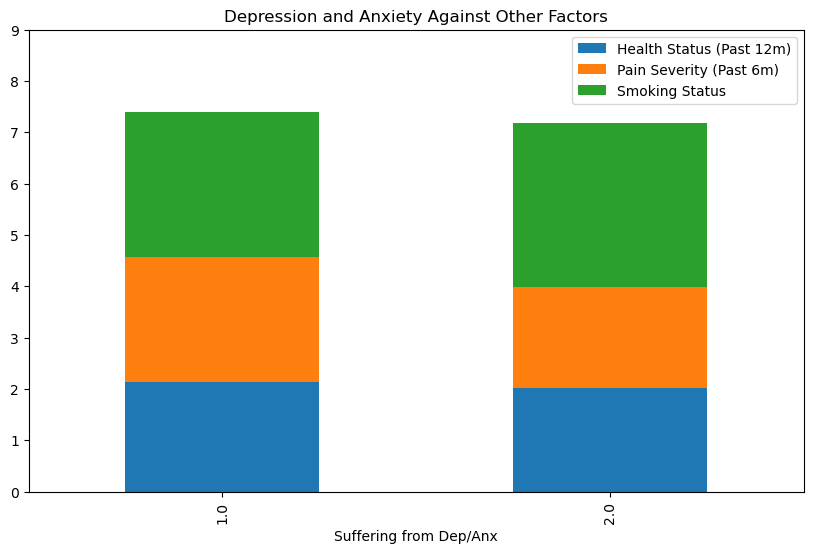

In [19]:
# Depressed vs undepressed in relation to other factors 
index = ["Depressed", "Undepressed"]
selected_col.groupby("Suffering from Dep/Anx").mean().plot.bar(figsize = (10, 6), stacked=True,
                                                               ylim=(0,9),
                                                               title="Depression and Anxiety Against Other Factors").legend(loc="best")

# Save image
plt.savefig("resources/Fig3.png")

### The percentage of smokers among those who do not have depression is slightly bigger than the percentage of smokers among those who have depression. Also, individuals with depression are more likely to have pain than those without. 

In [20]:
#Calculate Depression / Health Status Chi Square
def calcDepressionHealthSquare(column, indexList):
    
    dep_y_health = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==1][column].value_counts()
    dep_n_health = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==2][column].value_counts()
    
    
    dep_y_health = dep_y_health.reset_index()
    dep_n_health = dep_n_health.reset_index()

    dep_y_health = dep_y_health.loc[dep_y_health["index"].isin(indexList),:]
    dep_n_health = dep_n_health.loc[dep_n_health["index"].isin(indexList),:]
    
    dep_y_health["Depressed"] = "Yes"
    dep_n_health["Depressed"] = "No"
    
    dep_health_counts_df = pd.concat([dep_n_health,dep_y_health])
    

    dep_health_counts_df["Expected"] = dep_health_counts_df[column].mean()
    
    print(dep_health_counts_df)
    
    critical_value = st.chi2.ppf(q = 0.95, df = len(dep_health_counts_df["Expected"])-1)
    
    chiSquare = st.chisquare(dep_health_counts_df[column],dep_health_counts_df["Expected"])
    
    print(chiSquare)
    
calcDepressionFunctSquare("Health Status (Past 12m)", [1,2])

   index  Health Status (Past 12m) Depressed  Expected
1      1                      1806        No    966.25
2      2                      1681        No    966.25
1      2                       232       Yes    966.25
2      1                       146       Yes    966.25
Power_divergenceResult(statistic=2512.787322121604, pvalue=0.0)


In [21]:
#Calculate Depression / Pain Severity Chi Square
def calcDepressionHealthSquare(column, indexList):
    
    dep_y_pain = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==1][column].value_counts()
    dep_n_pain = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==2][column].value_counts()
    
    
    dep_y_pain = dep_y_pain.reset_index()
    dep_n_pain = dep_n_pain.reset_index()

    dep_y_pain = dep_y_pain.loc[dep_y_pain["index"].isin(indexList),:]
    dep_n_pain = dep_n_pain.loc[dep_n_pain["index"].isin(indexList),:]
    
    dep_y_pain["Depressed"] = "Yes"
    dep_n_pain["Depressed"] = "No"
    
    dep_pain_counts_df = pd.concat([dep_n_pain,dep_y_pain])
    

    dep_pain_counts_df["Expected"] = dep_pain_counts_df[column].mean()
    
    print(dep_pain_counts_df)
    
    critical_value = st.chi2.ppf(q = 0.95, df = len(dep_pain_counts_df["Expected"])-1)
    
    chiSquare = st.chisquare(dep_pain_counts_df[column],dep_pain_counts_df["Expected"])
    
    print(chiSquare)
    
calcDepressionFunctSquare("Pain Severity (Past 6m)", [1,2])

   index  Pain Severity (Past 6m) Depressed  Expected
0    2.0                     3634        No    1855.5
1    1.0                     3380        No    1855.5
0    2.0                      261       Yes    1855.5
2    1.0                      147       Yes    1855.5
Power_divergenceResult(statistic=5900.600916195096, pvalue=0.0)


In [22]:
#Calculate Depression / Pain Severity Chi Square
def calcDepressionSmokingSquare(column, indexList):
    
    dep_y_smoking = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==1][column].value_counts()
    dep_n_smoking = filtered_data_2017.loc[filtered_data_2017["Suffering from Dep/Anx"]==2][column].value_counts()
    
    
    dep_y_smoking = dep_y_smoking.reset_index()
    dep_n_smoking = dep_n_smoking.reset_index()

    dep_y_smoking = dep_y_smoking.loc[dep_y_smoking["index"].isin(indexList),:]
    dep_n_smoking = dep_n_smoking.loc[dep_n_smoking["index"].isin(indexList),:]
    
    dep_y_smoking["Depressed"] = "Yes"
    dep_n_smoking["Depressed"] = "No"
    
    dep_smoking_counts_df = pd.concat([dep_n_smoking,dep_y_smoking])
    

    dep_smoking_counts_df["Expected"] = dep_smoking_counts_df[column].mean()
    
    print(dep_smoking_counts_df)
    
    critical_value = st.chi2.ppf(q = 0.95, df = len(dep_smoking_counts_df["Expected"])-1)
    
    chiSquare = st.chisquare(dep_smoking_counts_df[column],dep_smoking_counts_df["Expected"])
    
    print(chiSquare)
    
calcDepressionSmokingSquare("Smoking Status", [1,2])

   index  Smoking Status Depressed  Expected
2      1            1416        No    501.75
3      2             349        No    501.75
1      1             207       Yes    501.75
3      2              35       Yes    501.75
Power_divergenceResult(statistic=2319.718485301445, pvalue=0.0)


In [23]:
# Create a new Data Frame with only Region and Sex
region_and_gender = df_17.loc[:,["Geographic Region", "SEX"]].head()
region_and_gender

,Geographic Region,SEX
0,3,2
1,2,1
2,2,1
3,2,2
4,3,1


In [24]:
# Create a dictionary for sex 
renamed_gen = {1: "Male",
               2: "Female"}
# Create a dictionary for Geographic Region
renamed_gr = {1: "Northeast",
              2: "Midwest",
              3: "South",
              4: "West"}

In [25]:
# Rename column "SEX" for Female and Male
df_17["SEX"] = df_17["SEX"].apply(lambda x: renamed_gen[x])

In [26]:
# # Rename column "Geographic Region"
df_17["Geographic Region"] = df_17["Geographic Region"].apply(lambda x: renamed_gr[x])

In [27]:
# Print Data Frame
df_17

,Suffering from Dep/Anx,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,...,Home Care Received (Past 12m),Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use
0,NaN,South,Female,12,1,4,1,1,2,2,...,2,2,2,NaN,4,NaN,2.0,0,2,1
1,NaN,Midwest,Male,12,1,7,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,6,2,1
2,2.0,Midwest,Male,12,1,1,2,2,2,2,...,2,2,1,2.0,3,2.0,NaN,7,2,1
3,NaN,Midwest,Female,12,1,5,2,2,2,2,...,2,2,1,NaN,4,NaN,2.0,0,1,1
4,NaN,South,Male,0,1,1,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26737,2.0,West,Female,12,1,1,2,1,2,2,...,2,2,1,NaN,4,NaN,2.0,1,2,1
26738,2.0,South,Female,12,1,4,1,2,2,2,...,2,2,1,NaN,4,NaN,2.0,2,2,1
26739,NaN,South,Female,12,2,1,1,1,2,2,...,2,2,1,NaN,2,NaN,2.0,0,2,1
26740,NaN,Northeast,Male,12,1,1,1,1,2,2,...,2,2,1,NaN,4,2.0,NaN,3,2,1


In [28]:
# Drop all NAN from selected column
anx_df = df_17[~(df_17['Suffering from Dep/Anx'].isna())]

In [29]:
# Converting column from float to int
anx_df['Suffering from Dep/Anx'] = anx_df['Suffering from Dep/Anx'].astype(int)

In [30]:
# See how many values are in the column
anx_df['Suffering from Dep/Anx'].unique()

array([2, 8, 1, 7, 9])

In [31]:
# Create a dictionary for column
renamed_anx = {1: "Yes",
               2: "No"}

In [32]:
# Adding the changes from the dictionary to the data frame
anx_df['Suffering from Dep/Anx'] = anx_df['Suffering from Dep/Anx'].map(renamed_anx)

anx_df = anx_df[~(anx_df['Suffering from Dep/Anx'].isna())]

In [33]:
# Get the the unique values from column
anx_df['Suffering from Dep/Anx'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
# Print Data Frame
anx_df

,Suffering from Dep/Anx,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,...,Home Care Received (Past 12m),Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use
2,No,Midwest,Male,12,1,1,2,2,2,2,...,2,2,1,2.0,3,2.0,NaN,7,2,1
7,No,South,Female,12,3,5,2,1,2,2,...,2,2,1,2.0,1,NaN,2.0,3,2,2
8,No,Midwest,Male,12,1,1,1,1,1,2,...,2,1,1,NaN,1,2.0,NaN,0,2,2
13,No,Midwest,Male,12,1,1,1,1,1,2,...,2,1,1,1.0,3,2.0,NaN,0,2,1
14,No,West,Male,12,1,8,2,2,2,2,...,2,2,3,2.0,2,2.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26733,No,South,Female,12,2,4,1,1,2,2,...,2,2,1,NaN,3,NaN,2.0,1,1,1
26736,No,South,Male,12,1,5,2,1,2,2,...,1,2,1,2.0,4,2.0,NaN,7,1,1
26737,No,West,Female,12,1,1,2,1,2,2,...,2,2,1,NaN,4,NaN,2.0,1,2,1
26738,No,South,Female,12,1,4,1,2,2,2,...,2,2,1,NaN,4,NaN,2.0,2,2,1


In [35]:
# Create Data frame with the selected columns 
bar_df = anx_df[['Suffering from Dep/Anx','Geographic Region','SEX']]

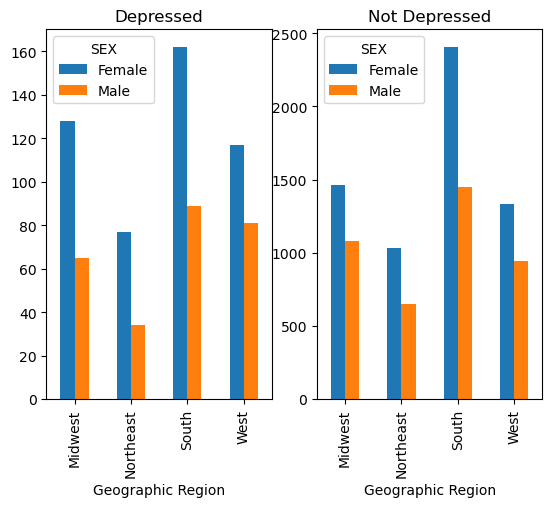

In [36]:
# Plot the columns in a Bar chart to see the relationship between: Region, Sex, and Yes or No Depressed population
fig,ax = plt.subplots(1,2)

bar_df.loc[bar_df['Suffering from Dep/Anx'] == 'Yes'].groupby('SEX')['Geographic Region']\
                      .value_counts().unstack().T.plot.bar( ax=ax[0], title= 'Depressed' )


bar_df.loc[bar_df['Suffering from Dep/Anx'] == 'No'].groupby('SEX')['Geographic Region']\
                      .value_counts().unstack().T.plot.bar( ax=ax[1], title='Not Depressed')

# Save image
plt.savefig("resources/Fig4.png")

### The number of females with depression is higher than the number of females without depression in the Midwest and West regions. 

In [37]:
# Count 'Yes' and 'No' from Suffering from Dep/Anx column
count_df = anx_df.groupby(['Geographic Region','Suffering from Dep/Anx'])['SEX'].count().unstack()
count_df['Yes']

Geographic Region
Midwest      193
Northeast    111
South        251
West         198
Name: Yes, dtype: int64

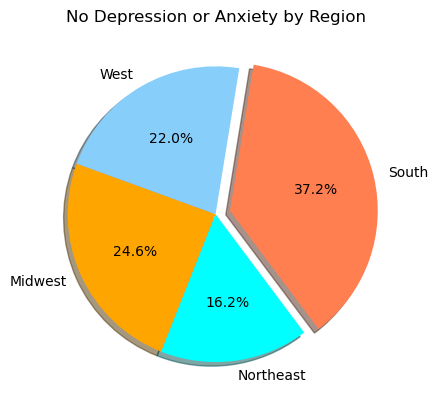

In [38]:
# Plot pie chart from people without depression by region
labels = count_df.index
sizes = count_df["No"]
colors = ["orange", "cyan", "coral", "lightskyblue"]
explode = (0, 0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('No Depression or Anxiety by Region')

# Save image
plt.savefig("resources/Fig5.png")

plt.show()

### The South has the highest number of people without depression. 

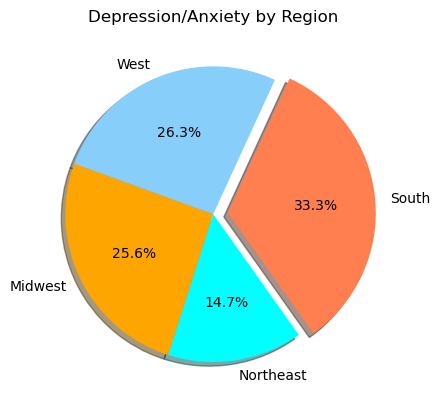

In [39]:
# Plot pie chart from people with depression by Region
labels = count_df.index
sizes = count_df["Yes"]
colors = ["orange", "cyan", "coral", "lightskyblue"]
explode = (0, 0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('Depression/Anxiety by Region')

# Save image
plt.savefig("resources/Fig6.png")

plt.show()

### The South has the highest number of people with depression. 